


# Project: Investigate a Dataset (TMDb Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



    



<a id='intro'></a>
## Introduction

Given the data collection of about 10,000 movies, each movie contains infomation about its budget, revenue, popularity, etc. The goal is to investigate ways to improve profit in movie industry.


### Approach
 1. Preview and clean the data.
    - Remove unnecessary information that are not useful for analysis 
    - Inspection for any null and duplicated values
    - Change data types if needed<br><br>
 2. Explore the data and draw conclusion to answer questions.
    - Study the stats to find meaningful information.
    - Group and filter certain data to find important patterns
    - Plot above data and make visualization to show the results.
    
 
 
    Questions
    1. Which movies are the most profitable to the market?
    2. Which movies have the most and least profit, budget and runtime?
    3. How does popularity affect the profit?
    4. Which years do movies made the most profit?
    5. what are the top casts, directors and genres?
    6. Which months have higher profits in movies? 
    

In [159]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from datetime import datetime as dt

<a id='wrangling'></a>
## Data Wrangling

In [160]:
# Load tmdb csv file and preview the first 5 rows
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [161]:
# Previous data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [162]:
# Preview stats for each columns
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


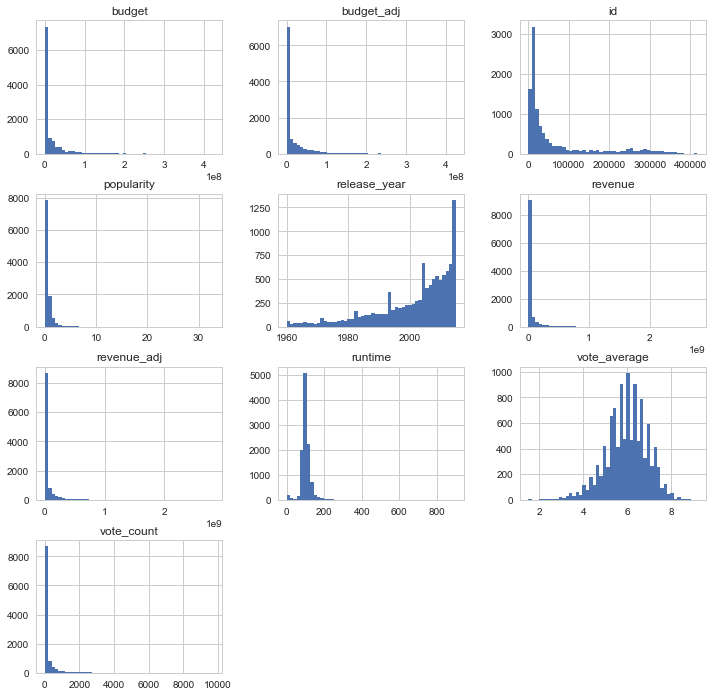

In [163]:
# Preview overall distribution of data from each properties
df.hist(figsize = (12,12), bins=50);

From above histograms, there seems to be many 0 values on budge and revenue. Rows contaning these values might need to be removed for more accurate results.


In [164]:

# lets see how many they have.
print (df[df['budget']==0].shape)
print (df[df['revenue']==0].shape)
print (df[df['popularity']==0].shape)

(5696, 21)
(6016, 21)
(0, 21)


- Based on the above, there are 5696 and 6016 counts of 0 values for budget and revenue columns, which is a lot. There is no 0 values for popularity column.


- Each movie receives differnt number of votes, so information about the vote_count and vote_average might not be useful.


- The columns id, imdb_id, homepage, keywords, overview, production_companies, vote_count, vote_average,  budget_adj and revenue_adj do not contain useful information, therefore, they can be droped from the dataset. 


Continue to..
- Drop columns that are not useful for further analysis.
- Delete duplicated and null values columns except budget and revenue.
- Drop movies with zero values in budget and revengue.



In [165]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [166]:
# Delete unnecessary columns
df.drop(['id', 'imdb_id','budget_adj', 'revenue_adj', 'homepage', 'keywords', 'tagline',
                              'overview', 'production_companies', 'vote_count', 'vote_average'], axis=1, inplace=True)

In [167]:
# Check remaining columns 
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015


In [168]:
df.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_date       object
release_year        int64
dtype: object

In [169]:
# Changing Release_date from string to datetime format, and change budget and revneue to integer
df['release_date'] = pd.to_datetime(df['release_date'])
df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df['popularity'] = df['popularity'].astype(int)
                                    

In [170]:
# Count total duplicates
df.duplicated().sum()


1

In [171]:
# Drop all duplicates
df.drop_duplicates(inplace=True)

In [172]:
# Check for null values. 
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
release_year       0
dtype: int64

In [173]:
# Fill the null values with zero. Check again

df.fillna(0, inplace = True)

In [174]:
#Drop rows with zero values in budget and revenue

df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)

df.dropna(inplace =True)

In [175]:
# Checking for values to be removed
print(df.isnull().sum())
print(df.duplicated().sum())

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64
0


<a id='eda'></a>
## Exploratory Data Analysis
After cleanning the data and removed unnecessary information that might affect the data set. Now the data is ready to be used to answer questions, study the statistics and build visualization to study relationships between each others. 

### Question 1. Which movies are the most profitable to the market?

In [176]:
# Create new column for the profit to find out which movie is more successful. Make sure it is in integer datatype

df['profit'] = df['revenue'] - df['budget']
df['revenue'] = df['revenue'].astype(int)
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
0,32,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.363529e+09


In [177]:
# Sort the data by profit and show the top 10 rows.

df.sort_values(['profit'], ascending = False).head(10)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
1386,9,237000000.0,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,2009,2.544506e+09
3,11,200000000.0,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.868178e+09
5231,4,200000000.0,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,1997-11-18,1997,1.645034e+09
0,32,150000000.0,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.363529e+09
4,9,190000000.0,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015,1.316249e+09
4361,7,220000000.0,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,2012-04-25,2012,1.299558e+09
3374,5,125000000.0,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,Adventure|Family|Fantasy,2011-07-07,2011,1.202818e+09
14,5,280000000.0,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,2015-04-22,2015,1.125036e+09
5422,6,150000000.0,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,2013-11-27,2013,1.124219e+09
8094,1,22000000.0,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114,Crime|Drama|Mystery|Thriller|Action,1995-07-28,1995,1.084280e+09


Above are  top 10 movies with the most earned profit. Clearly these titles are well knowed. Avatar is at tops 1, which profit exceded way more than the following movies.

### Question 2. Which movies have the most and least profit, budget and runtime? 

In [178]:
# Define a function to find the maximum and minimun of movies from each categories.
def max_min_data(column_name):
    
    # Find the max from the index number in the column, store to df
    highest_movie = df[column_name].idxmax()
    highest_df = pd.DataFrame(df.loc[highest_movie])
    
    # Find the min from the index number in the column, store to df
    lowest_movie = df[column_name].idxmin()
    lowest_df = pd.DataFrame(df.loc[lowest_movie])
    
    #concatenating two dfs
    max_min_data = pd.concat([highest_df, lowest_df], axis = 1)
    
    return max_min_data


max_min_data('profit')
    

,1386,2244
popularity,9,0
budget,2.37e+08,4.25e+08
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
release_year,2009,2010


In [59]:
# Use the same function for budget
max_min_data('budget')

,2244,2618
popularity,0,0
budget,4.25e+08,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
release_year,2010,1999


In [60]:
# Use the same function for runtime
max_min_data('runtime')

,2107,5162
popularity,0,0
budget,1.8e+07,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00
release_year,2010,2003


In [62]:
df.describe()

,popularity,budget,revenue,runtime,release_year,profit
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3.854000e+03
mean,0.709912,3.720370e+07,1.076866e+08,109.220291,2001.261028,7.048292e+07
std,1.472446,4.220822e+07,1.765393e+08,19.922820,11.282575,1.506195e+08
min,0.000000,1.000000e+00,2.000000e+00,15.000000,1960.000000,-4.139124e+08
25%,0.000000,1.000000e+07,1.360003e+07,95.000000,1995.000000,-1.321535e+06
50%,0.000000,2.400000e+07,4.480000e+07,106.000000,2004.000000,2.002019e+07
75%,1.000000,5.000000e+07,1.242125e+08,119.000000,2010.000000,8.170331e+07
max,32.000000,4.250000e+08,2.781506e+09,338.000000,2015.000000,2.544506e+09


We see again, Avatar earns the most profit after viewing on budget and runtime catogories. The function makes sense when comparing to the overall stats again. Avatar is also 75% higher in runtime and budget compare to other movie. It  shows that great movie requires lots of efforts.

Let's now see some data based on visual plots to help picture and understand the question.


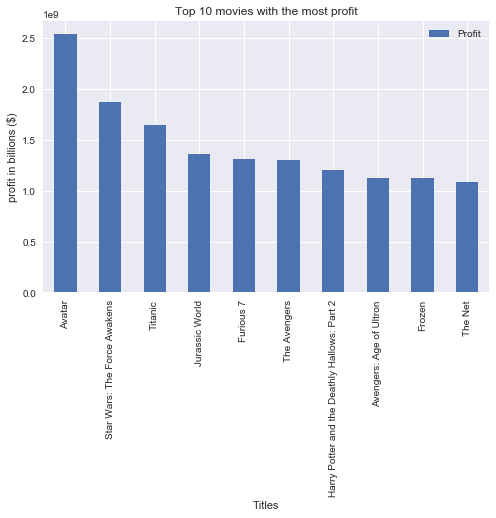

In [180]:
# Create a bar graph for the top 10 most profitable movies 


# First sort the raw data by the profit.
sorted_profit = df['profit'].sort_values(ascending=False)[:10]

# Create title and profit lists which will be used as X-axis and Y-axis values in bar graph.
high_profit=pd.DataFrame()
titles=[]
profit=[]

# Fill the vallues from raw data to the lists.
for i in sorted_profit.index:
    titles.append(df.loc[i,'original_title'])
    profit.append(sorted_profit.loc[i])
high_profit['Titles']=titles
high_profit['Profit']=profit
high_profit.set_index('Titles',inplace=True)

# Plot
high_profit.plot(kind ='bar',figsize=(8,5))
plt.title('Top 10 movies with the most profit');
plt.ylabel('profit in billions ($)');
sns.set_style('darkgrid')

From the above, the movie avatar made the most profit out of all movies from the dataset, its profit is close to double the profit earn by 'the Net' on top 10 from the list.

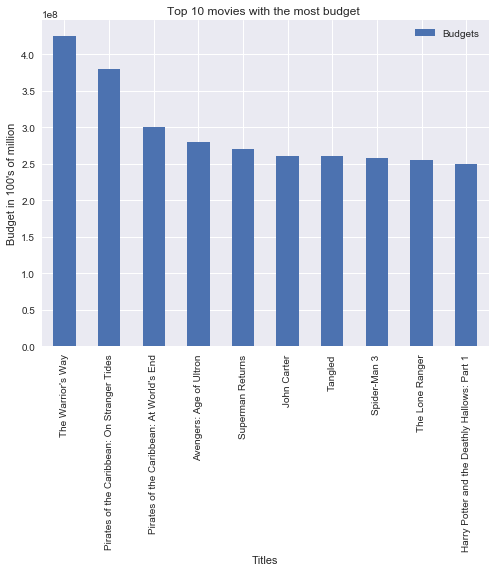

In [181]:
# DO the same for Budget
profit_year = df.groupby('release_year')['budget'].sum()
profit_year.head(5)# See the top 10 movies with the most expense
sorted_budget = df['budget'].sort_values(ascending=False)[:10]
high_budget=pd.DataFrame()
titles_exp=[]
budgets=[]
for i in sorted_budget.index:
    titles_exp.append(df.loc[i,'original_title'])
    budgets.append(sorted_budget.loc[i])
high_budget['Titles']=titles_exp
high_budget['Budgets']=budgets
high_budget.set_index('Titles',inplace=True)
high_budget.plot(kind ='bar',figsize=(8,6))
plt.title('Top 10 movies with the most budget ');
plt.ylabel('Budget in 100\'s of million');

The above showed the top 10 budget spent by the movies. The movie 'The Warrior's way spent about 400 miliions, which is way more than most movies earned profit. It might not be one of those most successful movie.

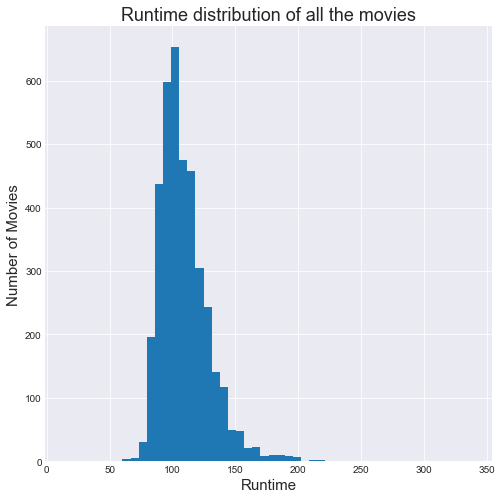

In [30]:
# Create a histogram for movie runtimes.

df['runtime'].hist(figsize = (8,8), bins = 50)
plt.xlabel('Runtime', fontsize = 15)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Runtime distribution of all the movies', fontsize=18);





Most movies are about 110 minutes, this makes sense with the statistis shown earlier.

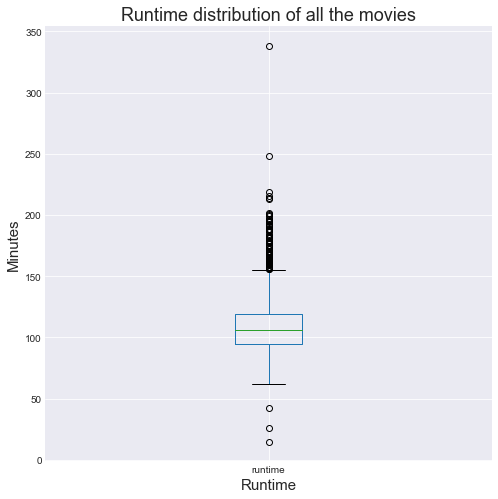

In [68]:
# Box plot for Runtim.

df['runtime'].plot(kind = 'box', figsize = (8,8));
plt.ylabel('Minutes', fontsize=15)
plt.xlabel('Runtime', fontsize=15)
plt.title('Runtime distribution of all the movies', fontsize=18);

Here is the Box plot for runtime. There are a few outliers at around 350 minutes and 15 minutes. This shouldnt affect the overall data since it contains about 10,000 movies

### Question 3. How does popularity affect the profit?

0.587911507546858

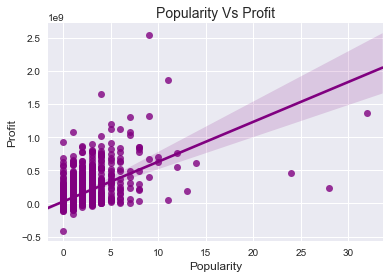

In [137]:
# Create a scatter plot to study relationship between popularity and porfit.

ax = sns.regplot(x=df['popularity'],y=df['profit'],color='purple')

#setup the title and the labels of the scatter plot.
ax.set_title("Popularity Vs Profit",fontsize=14)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})


def correlation_coeff(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)
    std_y=(y-y.mean())/y.std(ddof=0)
    return(std_x*std_y).mean()

correlation_coeff(df['popularity'],df['profit'])


From the scatter plot, it can be concluded that there is a positive relationship between popularity and profit. The trend line is on a uphill direction and the correlation coefficient value is calculated to be positive. However, the lower correlation coefficient value is less desirable and is possibly due to movies with high budget and low profit and other similar situations.

### Question 4. Which years do movies made the most profits?

In [32]:
# First group total profit by each years
profit_year = df.groupby('release_year')['profit'].sum()
profit_year.head(5)

release_year
1960    108198052.0
1961    299083188.0
1962    166879846.0
1963    115411882.0
1964    294678387.0
Name: profit, dtype: float64

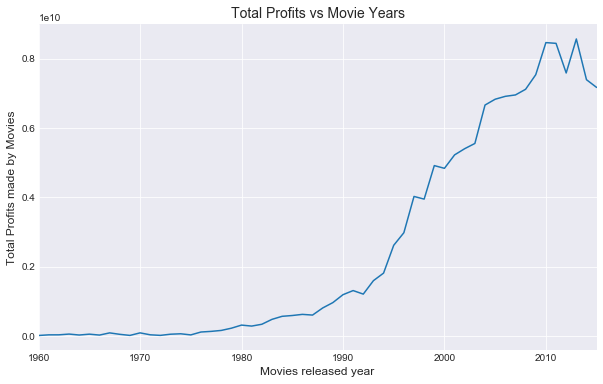

In [69]:
# plot the above query.
profit_year.plot(figsize = (10,6))
plt.xlabel('Movies released year', fontsize = 12)
plt.ylabel('Total Profits made by Movies', fontsize = 12)
plt.title('Total Profits vs Movie Years', fontsize = 14);

Line plot will be useful when dealing with time and number. The plot shows that profits increases as years increases.

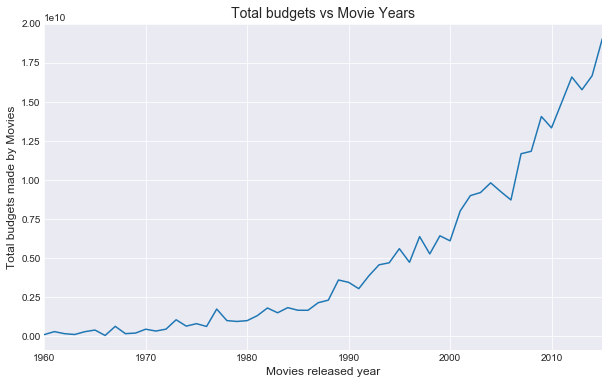

In [76]:
# Do the same for the budget
budget_year = df.groupby('release_year')['budget'].sum()
budget_year.head(5)

# plot the above query
profit_year.plot(figsize = (10,6))
plt.xlabel('Movies released year', fontsize = 12)
plt.ylabel('Total budgets made by Movies', fontsize = 12)
plt.title('Total budgets vs Movie Years', fontsize = 14);

The profit and budgets have silmilar trends over the years. Both increases and peak at about year 2010. It make sense that great movies are done with more money and efforts.

### Question 5. What are the top casts, directors and genres?

In [35]:
# to study about cast, we will separate each all people in each movie into every individuals.
df.loc[:,['original_title', 'cast', 'director', 'genres']].head()

,original_title,cast,director,genres
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller


In [124]:
def extract_data(column_name):
    df['cast']=df['cast'].astype(str)
    df['director']=df['director'].astype(str)
    
    # From the column entered, eparate the string by '|'
    all_data = df[column_name].str.cat(sep = '|')
    
    # StorE the values separately as series
    all_data = pd.Series(all_data.split('|'))
    
    # Read the descending order, starts with highest number
    count = all_data.value_counts(ascending = False)
    
    return count

In [133]:
# Use the function for the casts.

cast_count = extract_data('cast')
cast_count = pd.DataFrame(data=cast_count)

top_cast = cast_count.head(10)
top_cast

,0
Robert De Niro,52
Bruce Willis,46
Samuel L. Jackson,44
Nicolas Cage,43
Matt Damon,36
Johnny Depp,35
Morgan Freeman,34
Tom Hanks,34
Harrison Ford,34
Brad Pitt,34


In [134]:
# Use the function for the directors, plot.

director_count = extract_data('director')
director_count = pd.DataFrame(data=director_count)

top_director = director_count.head(10)
top_director



,0
Steven Spielberg,28
Clint Eastwood,24
Ridley Scott,21
Woody Allen,18
Tim Burton,17
Martin Scorsese,17
Steven Soderbergh,17
Robert Rodriguez,17
Oliver Stone,15
Brian De Palma,15


In [155]:
# Use the function for the genres, plot.

genres_count = extract_data('genres')
genres_count = pd.DataFrame(data=genres_count)

top_genres = genres_count.head(10)
top_genres

,0
Drama,4761
Comedy,3793
Thriller,2908
Action,2385
Romance,1712
Horror,1637
Adventure,1471
Crime,1355
Family,1231
Science Fiction,1230


### Question 6. Which months have higher profits?

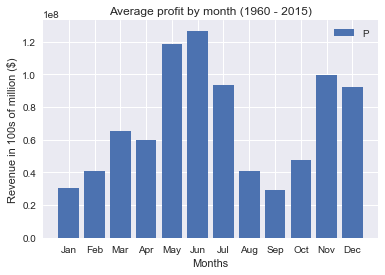

In [182]:
# Extract the month of release for every movie in a new column

df['release_month']=df['release_date'].dt.month

profit_by_month = df.groupby('release_month')['profit'].mean()

months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

Revenues = list(profit_by_month.get_values())
plt.bar(np.arange(0, 12), profit_by_month, tick_label = months, )
plt.title('Average profit by month (1960 - 2015)');
plt.ylabel('Revenue in 100s of million ($)');
plt.xlabel('Months');
plt.legend('Profit');

The bar chart proves the fact that movie are sold more during summar and winter breaks. It makes sense that people have school off and holidays during these time.

<a id='conclusions'></a>
## Conclusions

The TMDb movie dataset provide many information on all movies. After Data Wrangling, null values, duplicated values and 0 values were removed to provide more accurate results. Also, wrong datatypes were corrected and new columns such as profit and monthly profit_average were created for further analysis. 

Line plot, bar chart and histogram are made to help visualize and answer questions. From the results, it showed the top profits, budgets, casts, directors, genres, ect. it also showed the average profits made by each months. These provide valuable information on which movie characterists attracts more audience and how much more movies are sold compare to each months.

- Profits: profits has positive relationship with budget and popularity
- Runtime: Average of 101.22 minutes from all movies
- Profit by months: May and June in summaer time have high mean movie profits. Nov and Dec are the next two months with high mean movie profits.
- Top 1 cast: Robert De Niro
- Top 1 director: Steven Spielberg
- Tope 1 genre: Drama

### Limitation: 
Although we successfully predited the above properties on TMDb movie dataset, there are many infomation removed such as rows contained 0 values and null values. The dataset was cut by few thousand rows of movies, which would definitly affect the result. Also, every movies received different number of votes. Therefore, movies with fewer votes or higher votes would not be accurate. There should be a consistent way to collect the information in order to make it useful for analyzing the data.


## Sources.


- Pandas documents <br>

- Kaggle guide<br>

- github project<br> 

